Name: Muhammad Mahfuzur Rahman <br>
Matric Number: A18CS0312

In [ ]:
# Importing Pandas library
import pandas as pd
# Importing Numpy library
import numpy as np
# Importing matplotlib.pyplot for drawing graph
import matplotlib.pyplot as plt 
# For plotting the dataset in seaborn 
import seaborn as sns 
# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
# For feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
# For splitting the dataset in test and train data 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score 
# for plotting the scatter plot
import plotly.express as px 
import plotly.graph_objects as go

In [ ]:
# insert only .csv file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving penguins.csv to penguins.csv
User uploaded file "penguins.csv" with length 13516 bytes


In [ ]:
import io
penguin_data_frame = pd.read_csv(io.BytesIO(uploaded['penguins.csv']))

In [ ]:
# Checking if the dataframe is stored correctly
penguin_data_frame.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


##Pre-Analytics Data

In [ ]:
# checking the number of columns, column labels, column data types, memory usage, 
# range index, and the number of cells in each column (non-null values) in the penguin dataset.
penguin_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# Counting the number of penguins for each species
penguin_data_frame.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [ ]:
# checking the number of null values each columns have
penguin_data_frame.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
# replacing the null values of each columns, of floating values, with the median value 
for column_penguin in penguin_data_frame.select_dtypes(include='float', exclude='object'):
  penguin_data_frame.loc[:,column_penguin].fillna(penguin_data_frame.loc[:,column_penguin].median(), axis=0, inplace=True)

In [ ]:
# replacing the null value of the column "sex" with the next row value
penguin_data_frame.sex.fillna(method ='bfill', inplace = True)
# Making a copy of the dataset for visualization
penguin_data_frame_visualization = penguin_data_frame

In [ ]:
# checking if there is any null values left
penguin_data_frame.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
# Normalizing the non-numerical labels: "species", "island", "sex" using label encoding
label_encoder = LabelEncoder()
penguin_data_frame['species_label_encoded']= label_encoder.fit_transform(penguin_data_frame['species'])
penguin_data_frame['island_label_encoded']= label_encoder.fit_transform(penguin_data_frame['island'])
penguin_data_frame['sex_label_encoded']= label_encoder.fit_transform(penguin_data_frame['sex'])
penguin_data_frame.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_label_encoded,island_label_encoded,sex_label_encoded
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,male,0,2,1
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,female,0,2,0
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,female,0,2,0
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,female,0,2,0
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,female,0,2,0
5,Adelie,Torgersen,39.30,20.6,190.0,3650.0,male,0,2,1
6,Adelie,Torgersen,38.90,17.8,181.0,3625.0,female,0,2,0
7,Adelie,Torgersen,39.20,19.6,195.0,4675.0,male,0,2,1
8,Adelie,Torgersen,34.10,18.1,193.0,3475.0,female,0,2,0
9,Adelie,Torgersen,42.00,20.2,190.0,4250.0,female,0,2,0


In [ ]:
# Outlier Removal by z score treatment
# Calculating the boundary values:
features = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'species_label_encoded', 'island_label_encoded', 'sex_label_encoded']
for column_penguin in penguin_data_frame[features]:
  print("Highest allowed in {} is: {}".format(column_penguin, penguin_data_frame[column_penguin].mean() + 3 * penguin_data_frame[column_penguin].std()))
  print("Lowest allowed in {} is: {}\n\n".format(column_penguin, penguin_data_frame[column_penguin].mean() - 3 * penguin_data_frame[column_penguin].std()))                                          


Highest allowed in bill_length_mm is: 60.25637530160833
Lowest allowed in bill_length_mm is: 27.593624698391675


Highest allowed in bill_depth_mm is: 23.059214677853788
Lowest allowed in bill_depth_mm is: 11.244855089588071


Highest allowed in flipper_length_mm is: 242.96392008847832
Lowest allowed in flipper_length_mm is: 158.8209636324519


Highest allowed in body_mass_g is: 6599.961689147137
Lowest allowed in body_mass_g is: 1801.7824968993746


Highest allowed in species_label_encoded is: 3.598563949890442
Lowest allowed in species_label_encoded is: -1.7613546475648607


Highest allowed in island_label_encoded is: 2.8413728243608265
Lowest allowed in island_label_encoded is: -1.5157914290119896


Highest allowed in sex_label_encoded is: 2.0021849975165673
Lowest allowed in sex_label_encoded is: -1.0021849975165673




In [ ]:
# Finding out the outliers in the penguin dataset
print(penguin_data_frame[(penguin_data_frame['bill_length_mm'] > 60.25637530160835) | (penguin_data_frame['bill_length_mm'] < 27.5936246983917)])
print(penguin_data_frame[(penguin_data_frame['bill_depth_mm'] > 23.0592146778538) | (penguin_data_frame['bill_depth_mm'] < 11.244855089588075)])
print(penguin_data_frame[(penguin_data_frame['flipper_length_mm'] > 242.96392008847835) | (penguin_data_frame['flipper_length_mm'] < 158.82096363245188)])
print(penguin_data_frame[(penguin_data_frame['body_mass_g'] > 6599.961689147138) | (penguin_data_frame['body_mass_g'] < 1801.782496899374)])
print(penguin_data_frame[(penguin_data_frame['species_label_encoded'] > 3.5985639498904427) | (penguin_data_frame['species_label_encoded'] < -1.7613546475648616)])
print(penguin_data_frame[(penguin_data_frame['island_label_encoded'] > 2.841372824360822) | (penguin_data_frame['island_label_encoded'] < -1.5157914290119852)])
print(penguin_data_frame[(penguin_data_frame['sex_label_encoded'] > 2.0021849975165673) | (penguin_data_frame['sex_label_encoded'] < -1.0021849975165673)])
# all of them return as empty dataframe which means that the dataset does not have any outliers

Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex, species_label_encoded, island_label_encoded, sex_label_encoded]
Index: []
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex, species_label_encoded, island_label_encoded, sex_label_encoded]
Index: []
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex, species_label_encoded, island_label_encoded, sex_label_encoded]
Index: []
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex, species_label_encoded, island_label_encoded, sex_label_encoded]
Index: []
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex, species_label_encoded, island_label_encoded, sex_label_encoded]
Index: []
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, f

##Feature Selection
<p>For feature selection, we are using Feature Importance and heatmap of correlation matrix.</p>
Feature importance technique is used to choose the importance features. It basically uses a trained supervised classifier to select features. We can implement this feature selection technique with the help of ExtraTreeClassifier class of scikit-learn Python library.The higher the score, higher is the importance of that attribute.

In [ ]:
# Droping the non-numerical values 
penguin_data_frame_copy = penguin_data_frame.copy()
penguin_data_frame_copy.drop(['species', 'island', 'sex'], inplace=True, axis=1)

In [ ]:
# Using feature importance
train_data = penguin_data_frame_copy.values
X = train_data[:,0:6]
Y = train_data[:,6]
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.19944873 0.27913285 0.15212571 0.29786679 0.04435682 0.0270691 ]


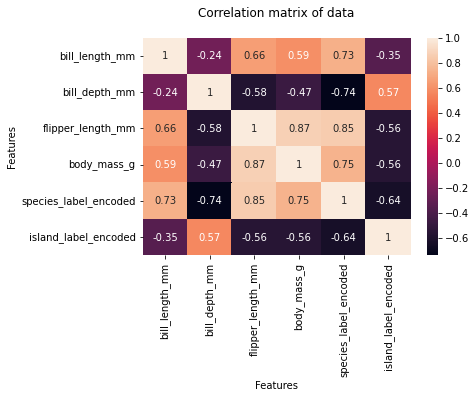

In [ ]:
# Heatmap of correlation matrix 
features = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'species_label_encoded', 'island_label_encoded']
corelation = penguin_data_frame[features].corr()
heatmap = sns.heatmap(corelation, annot = True)
heatmap.set(xlabel='Features', ylabel='Features', title = "Correlation matrix of data\n")
plt.show()

## Supervised Learning (Decision tree)

In [ ]:
# Normalization of the features bill_length_mm,bill_depth_mm,flipper_length_mm, body_mass_g
from sklearn.preprocessing import StandardScaler

for column in penguin_data_frame[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]:
  penguin_data_frame[column] = StandardScaler().fit_transform(penguin_data_frame[[column]])

In [ ]:
# Splitting the dataset into test and train data
features = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'island_label_encoded', 'sex_label_encoded']
# since these are the features, we take them as x
x_feature = penguin_data_frame[features]
# since species is the output or label we'll take it as y
y_label = penguin_data_frame['species_label_encoded']
x_train, x_test, y_train, y_test = train_test_split(x_feature, y_label, test_size = 0.2, train_size = 0.8,
                                                    random_state = 42, shuffle=True, 
                                                    stratify = y_label)
print("\nShape of x_train:\n{}".format(x_train.shape))
print("\nShape of x_test:\n{}".format(x_test.shape))
print("\nShape of y_train:\n{}".format(y_train.shape))
print("\nShape of y_test:\n{}".format(y_test.shape))


Shape of x_train:
(275, 6)

Shape of x_test:
(69, 6)

Shape of y_train:
(275,)

Shape of y_test:
(69,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_decision_tree = DecisionTreeClassifier()
model_decision_tree = model_decision_tree.fit(x_train, y_train)
y_prediction_decision_tree = model_decision_tree.predict(x_test)
report=pd.DataFrame()
report['Actual values'] = y_test
report['Predicted values of Decision tree']= y_prediction_decision_tree
print(report)

from sklearn.metrics import accuracy_score
print("\n\nAccuracy for Decision tree: ", accuracy_score(y_test, y_prediction_decision_tree))

     Actual values  Predicted values of Decision tree
151              0                                  0
1                0                                  0
226              2                                  2
269              2                                  2
282              1                                  1
..             ...                                ...
288              1                                  1
168              2                                  2
52               0                                  0
121              0                                  0
249              2                                  2

[69 rows x 2 columns]


Accuracy for Decision tree:  0.9855072463768116


In [ ]:
# Classification Report
from sklearn.metrics import classification_report

print("Classification Report of Decision tree:")
print(classification_report(y_test, y_prediction_decision_tree))

Classification Report of Decision tree:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       1.00      1.00      1.00        14
           2       0.96      1.00      0.98        25

    accuracy                           0.99        69
   macro avg       0.99      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69



## Optimization of Decision tree using RandomizedSearchCV

In [ ]:
# importing the RandomizedSearchCV from model selection of sklearn
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Setting the parameters of DecisionTreeClassifier to check which parameter provides the best results
parameters = {'max_depth' : (3, 5, 7, 9, 11, 13, 15, 17, 19, 21),
              'criterion' : ('gini', 'entropy'),
              'max_features' : ('auto', 'sqrt', 'log2'),
              'min_samples_split' : (2, 4, 6, 8, 10)
             }

In [ ]:
decision_tree_optimization = RandomizedSearchCV(DecisionTreeClassifier(), 
                                                param_distributions = parameters, cv = 10, verbose = True)
decision_tree_optimization.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6, 8, 10)},
                   verbose=True)

In [ ]:
decision_tree_optimization.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=17, max_features='log2',
                       min_samples_split=4)

In [ ]:
#Building the Model with Best Estimators
model_decision_tree = DecisionTreeClassifier(class_weight=None, criterion='entropy',
                       max_depth=17, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0,random_state=None, splitter='best',ccp_alpha=0.0)

model_decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17, max_features='log2',
                       min_samples_split=4)

In [ ]:
print (f'Train Accuracy: {model_decision_tree.score(x_train,y_train):.4f}')
print (f'Test Accuracy: {model_decision_tree.score(x_test,y_test):.4f}')

Train Accuracy: 0.9891
Test Accuracy: 1.0000


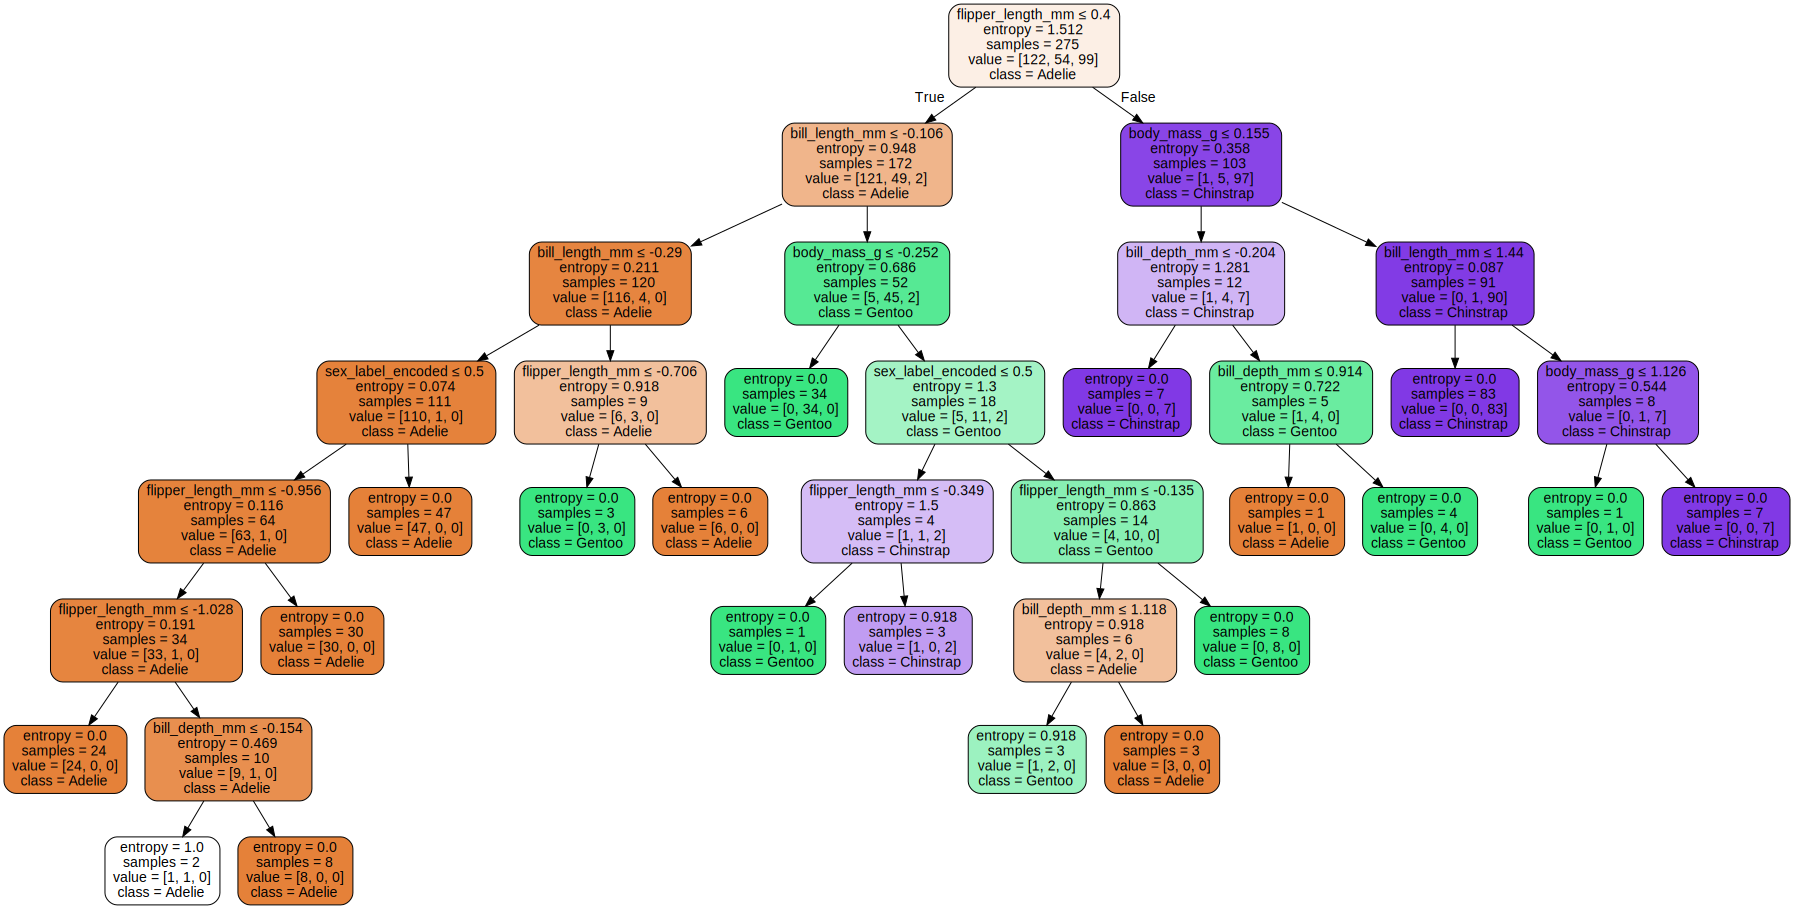

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(model_decision_tree,   
                      out_file = None, 
                      feature_names = x_feature.columns,
                      class_names = ['Adelie', 'Gentoo', 'Chinstrap'],
                      filled = True, rounded = True,
                      special_characters=True)  
graph_DT = graphviz.Source(dot_data)  
graph_DT 

In [ ]:
dot_data = export_graphviz(model_decision_tree, out_file=None, 
                      feature_names=x_feature.columns,  
                      class_names=['Adelie', 'Gentoo', 'Chinstrap'],
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("Penguin_species_decision_tree_estimater")

'Penguin_species_decision_tree_estimater.pdf'